# Предобработка

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Обработка данных

Наш исходный набор данных уже не содержит пропущенных значений, поэтому данные можно считать нормализованными.

In [2]:
df = pd.read_csv('../data/SpotifyFeatures.csv')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


## Построение графиков

### Линейный график популярности треков

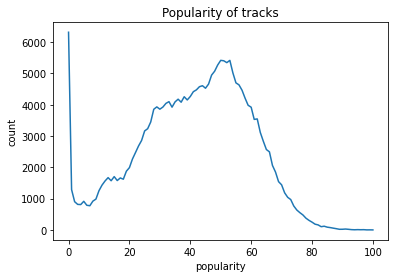

In [3]:
popularity_count = df.popularity.value_counts().sort_index()
plt.plot(popularity_count.index, popularity_count.values)

plt.title('Popularity of tracks')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

Можно заметить, что у количества треков по популярности есть два пиковых значения — в середине (то есть средние по популярность треки) и около нуля (то есть самые непопулярные треки).

### Гистограмма продолжительности треков

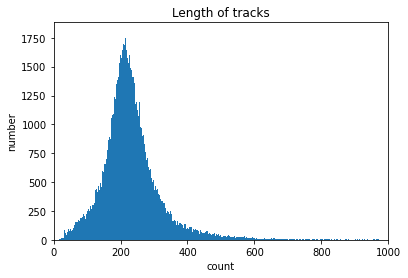

In [4]:
df['duration_s'] = df.duration_ms // 1000
df['duration_min'] = df.duration_s / 60

plt.hist(df.duration_s, bins=range(df.duration_s.min(), df.duration_s.max()))
plt.title('Length of tracks')
plt.xlabel('count')
plt.xlim([0, 1000])
plt.ylabel('number')
plt.show()

Согласно графику, видно, что длина треков имеет скорее нормальное распределение. Пиковое значение составляет около $210$ секунд.

### 2D гистограмма энергичности и танцевальности

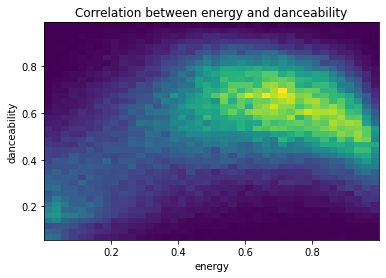

In [5]:
plt.hist2d(df.energy, df.danceability, bins=40)
plt.title('Correlation between energy and danceability')
plt.xlabel('energy')
plt.ylabel('danceability')
plt.show()

Судя по графику, наименее энергичные треки являются так же и наименее танцевальными. Однако, обратное неверно — наиболее энергичные треки выходят средними по танцевальности. Пиковое же значение для танцевальности достигается между значениями энергичности $0.4$ и $0.7$. Пиковое значение по обоим параметрам достигается около отметки $(0.7, 0.7)$.

### График распределения акустичности и инструментальности

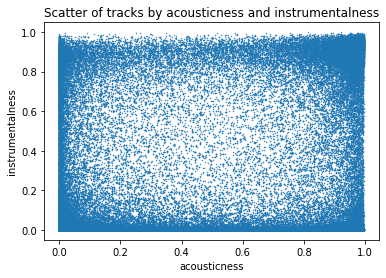

In [6]:
plt.scatter(df.acousticness, df.instrumentalness, s=0.2)
plt.title('Scatter of tracks by acousticness and instrumentalness')
plt.xlabel('acousticness')
plt.ylabel('instrumentalness')
plt.show()

Благодаря графику, можно сделать интересное наблюдение: акустичность и инструментальность совместно избегают неграничных значений. То есть, хотя бы один из этих параметров скорее всего будет принимать значение, близкое к границе (то есть около $0$ или $1$).

### Boxplots

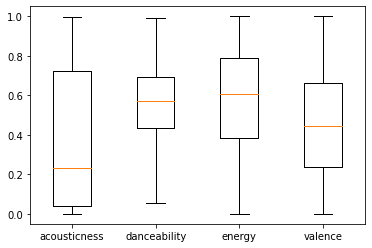

In [7]:
track_features = ['acousticness', 'danceability', 'energy', 'valence']
plt.boxplot(df[track_features], labels=track_features)
plt.show()

## Новые параметры

Поддержим ещё один параметр для треков. По аналогии с BMI для людей, реализуем Track Popularity Index. В качестве веса будем учитывать квадратный корень из популярности (квадратный корень — для того, чтобы разница между значениями не была такой высокой), а в качестве роста — длину трека в минутах.

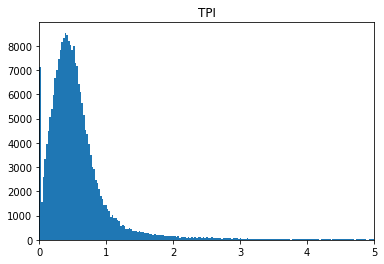

In [8]:
df['tpi'] = df.popularity.pow(1. / 2) / df.duration_min.pow(2)

plt.hist(df.tpi, bins=2500)
plt.xlim([0, 5])
plt.title('TPI')
plt.show()